<a href="https://colab.research.google.com/github/nrussell93/prework-about-me/blob/master/Machine_Learning_Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning Homework 2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'final theta: '

array([2.14588162e-01, 8.60510319e+02, 6.97129338e-01, 3.48639486e-01,
       5.07147309e-01, 1.77946851e-01])

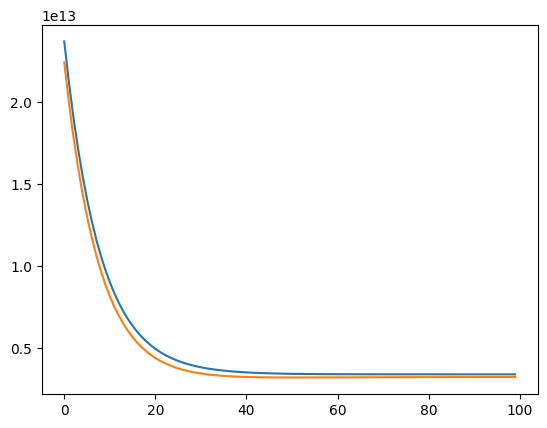

'final theta: '

array([2.14588151e-01, 8.60510276e+02, 6.97129308e-01, 3.48639472e-01,
       5.07147289e-01, 1.90985036e-01, 5.59383985e-02, 9.56840808e-02,
       2.14020625e-02, 1.09888717e-01, 1.77946843e-01, 6.78276027e-02])

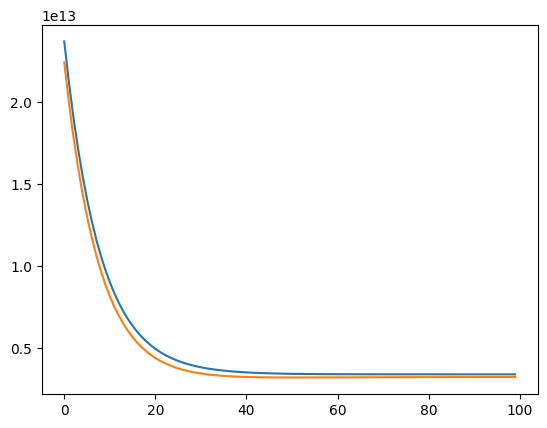

In [58]:
# Problem 1a and 1b

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Colab Notebooks/Housing.csv'
housing = pd.read_csv(file_path)
housing.head()
housing.shape

housing.isnull().sum()*100/housing.shape[0]

var_list =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Turn Yes and No into 1 and 0
def data_map(x):
    return x.map({'yes': 1, 'no': 0, 'unfurnished': 0, 'semi-furnished': 0.5, 'furnished': 1})
housing[var_list] = housing[var_list].apply(data_map)
housing.head()

from sklearn.model_selection import train_test_split
np.random.seed(0)
train, test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)
train.head()
test.head()
iterations = 100
def grad_desc(train, test, y_train, y_test, alpha, theta, iterations):
    train_losses = []
    val_losses = []
    iterations = 100

    for iteration in range(iterations):
        gradients = 2/(len(train)) * train.T.dot(train.dot(theta) - y_train)
        theta -= alpha * gradients

        train_loss = (1/len(train)) * np.sum(np.square(train.dot(theta) - y_train))
        val_loss = (1/len(test)) * np.sum(np.square(test.dot(theta) - y_test))

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return train_losses, val_losses

alpha = 0.000000001
iterations = 200
theta_a = np.zeros(6)
theta_b = np.zeros(12)
y_train = train.values[:,0]
m_train = len(y_train)
y_test = test.values[:,0]
m_test = len(y_test)

numVars_a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
newTrain_a = np.c_[np.ones((m_train, 1)), train[numVars_a]]
newTest_a = np.c_[np.ones((m_test, 1)), test[numVars_a]]
numVars_b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
newTrain_b = np.c_[np.ones((m_train, 1)), train[numVars_b]]
newTest_b = np.c_[np.ones((m_test, 1)), test[numVars_b]]

train_losses, val_losses = grad_desc(newTrain_a, newTest_a, y_train, y_test, alpha, theta_a, iterations)
display("final theta: ", theta_a)
# Plot training and validation loss relative to iteration for 1a
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.show()

# Now for Part 1b
train_losses, val_losses = grad_desc(newTrain_b, newTest_b, y_train, y_test, alpha, theta_b, iterations)
display("final theta: ", theta_b)
# Plot traing and validation loss relation to iteration for 1b
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.show()



'Final Theta for 2a: '

array([4567680.26843261,  697690.85790584,  136563.22363736,
        612787.92873408,  436605.41464524,  304745.94667324])

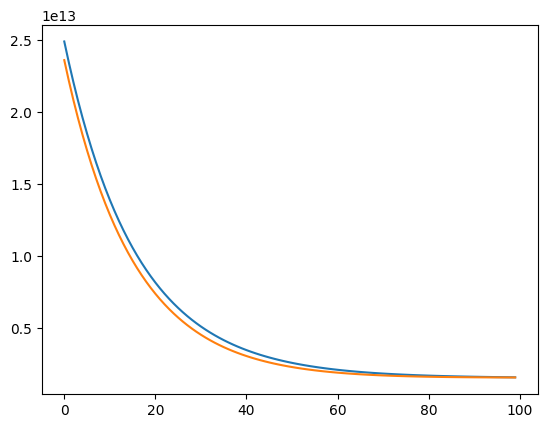

In [86]:
# Problem 2a

# Normalize the data from part a
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
# Apply to training set
normTrain_a = train
normTrain_a[numVars_a] = scaler.fit_transform(normTrain_a[numVars_a])
normTrain_a.head()
# Apply to test set
normTest_a = test
normTest_a[numVars_a] = scaler.fit_transform(normTest_a[numVars_a])
normTest_a.head()

# Standardize the data from part a
from sklearn.preprocessing import StandardScaler
stand = StandardScaler()
# Standardize the training set
standTrain_a = train
standTrain_a[numVars_a] = stand.fit_transform(standTrain_a[numVars_a])
standTrain_a.head()
# Standardize the test set
standTest_a = test
standTest_a[numVars_a] = stand.fit_transform(standTest_a[numVars_a])
standTest_a.head()

newNormalTrain_a = np.c_[np.ones((m_train,1)), normTrain_a[numVars_a]]
newNormalTest_a = np.c_[np.ones((m_test,1)), normTest_a[numVars_a]]
newTheta_a = np.zeros(6)
iterations_a = 300
alpha_a = 0.015
# Set gradient descent now that data is normalized and standardized
train_losses, val_losses = grad_desc(newNormalTrain_a, newNormalTest_a, y_train, y_test, alpha_a, newTheta_a, iterations_a)
display("Final Theta for 2a: ", newTheta_a)
# Plot training and validation for the normalized and standardized data
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.show()


'Final Theta for 2b: '

array([4714823.73668042,  521039.51838835,   99323.12210107,
        563777.78434286,  354186.36995395,  217059.73316938,
        156359.28770022,  134928.77970243,  200317.37166743,
        400855.73383332,  229232.57884164,  256798.89772993])

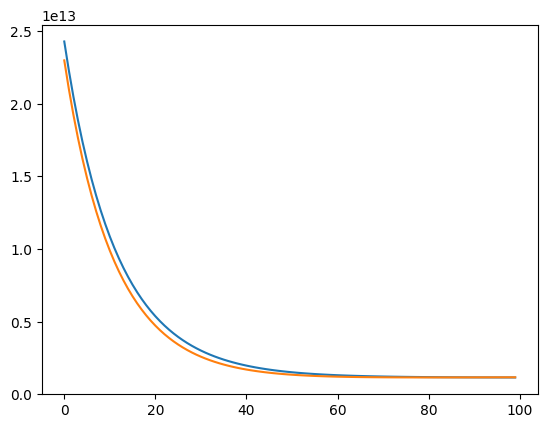

In [85]:
# Problem 2b

# Normalize the data from part 1b
from sklearn.preprocessing import MinMaxScaler
scaler_b = MinMaxScaler()
numVars_b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
# Apply to training set
normTrain_b = train
normTrain_b[numVars_b] = scaler_b.fit_transform(normTrain_b[numVars_b])
normTrain_b.head()
# Apply to test set
normTest_b = test
normTest_b[numVars_b] = scaler_b.fit_transform(normTest_b[numVars_b])
normTest_b.head()

# Standardize the data from part 1b
from sklearn.preprocessing import StandardScaler
stand_b = StandardScaler()
# Standardize the training set
standTrain_b = train
standTrain_b[numVars_b] = stand_b.fit_transform(standTrain_b[numVars_b])
standTrain_b.head()
# Standardize the test set
standTest_b = test
standTest_b[numVars_b] = stand_b.fit_transform(standTest_b[numVars_b])
standTest_b.head()


newNormalTrain_b = np.c_[np.ones((m_train,1)), normTrain_b[numVars_b]]
newNormalTest_b = np.c_[np.ones((m_test,1)), normTest_b[numVars_b]]
newTheta_b = np.zeros(12)
iterations_b = 1000
alpha_b = 0.02
# Set gradient descent now that data is normalized and standardized
train_losses, val_losses = grad_desc(newNormalTrain_b, newNormalTest_b, y_train, y_test, alpha_b, newTheta_b, iterations_b)
display("Final Theta for 2b: ", newTheta_b)
# Plot training and validation for the normalized and standardized data
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.show()



